# 1 c)

In [18]:
import numpy as np

In [21]:
sequence = []

with open('Input.txt', 'rt', encoding='utf-8') as fp:
    while line := fp.readline(): 
         sequence.append(float(line))

sequence = np.array(sequence)

In [22]:
def log_likelihood(seq, theta):
    l = 0
    for term in seq:
        l += term * np.log(theta) if term == 1 else (1 - term) * np.log(1 - theta)
    return l

In [24]:
thetas = [0.3, 0.4, 0.5, 0.6, 0.7]

In [32]:
ls = np.array(list(map(lambda theta: log_likelihood(sequence, theta = theta), thetas)))

In [33]:
np.savetxt('Exc8Task1c.txt', ls, delimiter=',', fmt='%1.3f')

# 1 d)

In [41]:
import matplotlib.pyplot as plt

In [35]:
def likelihood(seq, theta):
    l = 1
    for term in sequence:
        l *= theta ** term if term == 1 else (1 - theta) ** (1 - term)
    return l

In [36]:
thetas = np.linspace(0.1,0.9,50)

In [38]:
Ls = np.array(list(map(lambda theta: likelihood(sequence, theta = theta), thetas)))

In [39]:
ls = np.array(list(map(lambda theta: log_likelihood(sequence, theta = theta), thetas)))

Text(0, 0.5, 'likelihood')

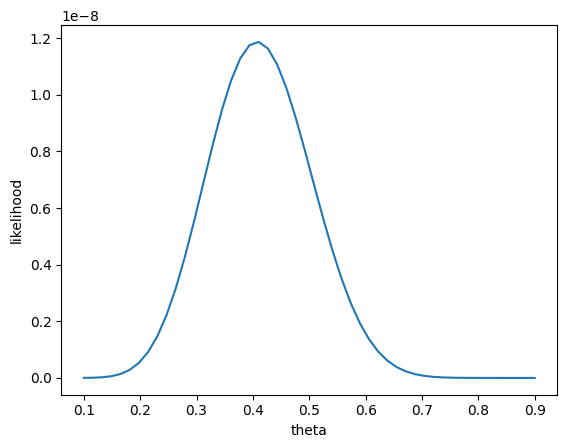

In [45]:
plt.plot(thetas, Ls)
plt.xlabel('theta')
plt.ylabel('likelihood')

Text(0, 0.5, 'log-likelihood')

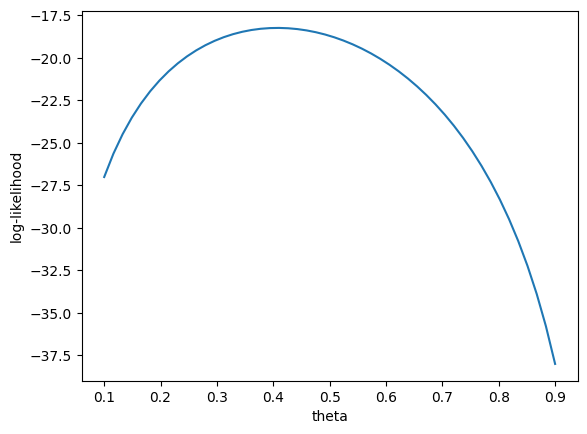

In [46]:
plt.plot(thetas, ls)
plt.xlabel('theta')
plt.ylabel('log-likelihood')

# 2 d)

In [244]:
import numpy as np

In [245]:
sequence = []

with open('Input.txt', 'rt', encoding='utf-8') as fp:
    while line := fp.readline(): 
         sequence.append(float(line))

sequence = np.array(sequence)

In [246]:
def log_likelihood(seq, theta_1, theta_2):
    mapping = {(0, 0): theta_1,
               (0, 1): 1 - theta_1,
               (1, 0): 1 - theta_2,
               (1, 1): theta_2}

    l = 0
    for i in range(len(seq) - 1):
        transition = tuple(tuple(x.item() for x in seq[i:i+2]))
        l += -np.log(mapping[transition])
    return l

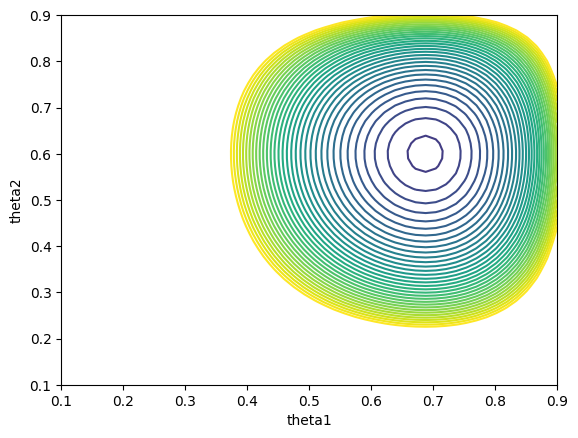

In [247]:
theta_1 = np.linspace(0.1,0.9,50)
theta_2 = np.linspace(0.1,0.9,50)

theta_1_mesh, theta_2_mesh = np.meshgrid(theta_1, theta_2)

l = log_likelihood(sequence, theta_1_mesh, theta_2_mesh)

levels = np.arange(16, 20, 0.1)

plt.contour(theta_1_mesh, theta_2_mesh, l, levels)
plt.xlabel('theta1')
plt.ylabel('theta2')

plt.show()

# 2 e)

In [248]:
from scipy.optimize import minimize
from scipy.optimize import Bounds

In [249]:
def log_likelihood(seq, theta):
    mapping = {(0, 0): theta[0],
               (0, 1): 1 - theta[0],
               (1, 0): 1 - theta[1],
               (1, 1): theta[1]}

    l = 0
    eps = 1e-12
    for i in range(len(sequence) - 1):
        transition = tuple(tuple(x.item() for x in sequence[i:i+2]))
        l += -np.log(mapping[transition] + eps)
        
    return l

In [250]:
theta0 = [0.5, 0.5]
bounds = ((0, 1), (0, 1))

In [251]:
res = minimize(lambda theta: log_likelihood(sequence, theta), theta0, bounds=bounds, method='SLSQP')

In [252]:
np.savetxt('Exc8Task2e.txt', res.x, delimiter=',', fmt='%1.2f')